In [1]:
import tensorflow as tf
import tensorflow_data_validation as tfdv
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow_metadata.proto.v0 import schema_pb2
import numpy as np

# 1. Load the Dataset

In [2]:
preprocessed_dataset_df = pd.read_csv('preprocessed_dataset.csv', index_col = 0)

In [3]:
train_df, test_df = train_test_split(preprocessed_dataset_df, test_size=0.2, shuffle=True, stratify = preprocessed_dataset_df['label'])

In [4]:
train_df.head()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y16,x17,y17,x18,y18,x19,y19,x20,y20,label
6784,0.0,0.0,-0.256579,-0.072727,-0.467105,-0.190909,-0.684211,-0.263636,-0.730263,-0.381818,...,-0.954545,0.197368,-0.522727,0.269737,-0.736364,0.230263,-0.877273,0.151316,-1.000000,6
9074,0.0,0.0,-0.106529,-0.421053,-0.285223,-0.543860,-0.419244,-0.438596,-0.487973,-0.271930,...,0.070175,-0.398625,0.324561,-0.577320,0.350877,-0.522337,0.307018,-0.450172,0.280702,8
1274,0.0,0.0,-0.530120,-0.067568,-0.915663,-0.270270,-0.819277,-0.463964,-0.481928,-0.509009,...,-0.977477,0.084337,-0.490991,-0.024096,-0.639640,-0.096386,-0.747748,-0.144578,-0.851351,2
26031,0.0,0.0,-0.218310,-0.042146,-0.260563,-0.206897,0.084507,-0.367816,0.373239,-0.486590,...,-0.965517,0.211268,-0.402299,0.253521,-0.509579,0.260563,-0.452107,0.253521,-0.379310,22
11782,0.0,0.0,-0.225352,-0.198381,-0.169014,-0.441296,0.112676,-0.542510,0.309859,-0.550607,...,-0.315789,0.598592,-0.251012,0.563380,-0.356275,0.366197,-0.279352,0.309859,-0.214575,10


In [5]:
test_df.head()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y16,x17,y17,x18,y18,x19,y19,x20,y20,label
8974,0.0,0.0,-0.137255,-0.289256,-0.345098,-0.404959,-0.509804,-0.322314,-0.627451,-0.190083,...,0.066116,-0.352941,0.206612,-0.592157,0.338843,-0.525490,0.330579,-0.450980,0.272727,8
3591,0.0,0.0,-0.387387,-0.042424,-0.648649,-0.187879,-0.819820,-0.333333,-0.936937,-0.472727,...,-0.975758,0.063063,-0.666667,-0.045045,-0.866667,-0.216216,-0.951515,-0.414414,-0.975758,3
26128,0.0,0.0,-0.277228,-0.102679,-0.306931,-0.294643,0.118812,-0.428571,0.495050,-0.482143,...,-0.928571,0.346535,-0.388393,0.396040,-0.495536,0.356436,-0.446429,0.306931,-0.370536,22
16583,0.0,0.0,-0.258993,-0.209581,-0.438849,-0.443114,-0.611511,-0.616766,-0.618705,-0.736527,...,-0.814371,0.381295,-0.580838,0.179856,-0.760479,-0.064748,-0.796407,-0.251799,-0.778443,14
28648,0.0,0.0,-0.154229,-0.297872,-0.213930,-0.595745,-0.248756,-0.843972,-0.318408,-1.000000,...,-0.361702,0.348259,-0.368794,0.497512,-0.510638,0.577114,-0.574468,0.681592,-0.680851,24


# 2. Data Validation using TensorFlow Data Validation library.

In [6]:
train_stats = tfdv.generate_statistics_from_dataframe(train_df)
test_stats = tfdv.generate_statistics_from_dataframe(test_df)
tfdv.visualize_statistics(train_stats)

In [7]:
#infer schema
schema = tfdv.infer_schema(statistics=train_stats)
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'x0',FLOAT,required,,-
'y0',FLOAT,required,,-
'x1',FLOAT,required,,-
'y1',FLOAT,required,,-
'x2',FLOAT,required,,-
'y2',FLOAT,required,,-
'x3',FLOAT,required,,-
'y3',FLOAT,required,,-
'x4',FLOAT,required,,-


In [8]:
#compare_statistics
tfdv.visualize_statistics(lhs_statistics = test_stats,
                         rhs_statistics = train_stats,
                         lhs_name = 'Evaluation Data',
                         rhs_name = 'Training Data')


In [9]:
#anomalies
anomalies = tfdv.validate_statistics(statistics = test_stats, schema = schema)
tfdv.display_anomalies(anomalies)

C:\Users\Dani\anaconda3\envs\DL\lib\site-packages\tensorflow_data_validation\utils\display_util.py:217: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


Let's drop the first 2 columns, x0 and y0, they dont contribute any predictive value.

In [10]:
train_df.drop(columns=['x0', 'y0'], inplace = True)
test_df.drop(columns=['x0', 'y0'], inplace = True)

C:\Users\Dani\anaconda3\envs\DL\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
train_df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y16,x17,y17,x18,y18,x19,y19,x20,y20,label
6784,-0.256579,-0.072727,-0.467105,-0.190909,-0.684211,-0.263636,-0.730263,-0.381818,-0.151316,-0.536364,...,-0.954545,0.197368,-0.522727,0.269737,-0.736364,0.230263,-0.877273,0.151316,-1.000000,6
9074,-0.106529,-0.421053,-0.285223,-0.543860,-0.419244,-0.438596,-0.487973,-0.271930,-0.439863,-0.649123,...,0.070175,-0.398625,0.324561,-0.577320,0.350877,-0.522337,0.307018,-0.450172,0.280702,8
1274,-0.530120,-0.067568,-0.915663,-0.270270,-0.819277,-0.463964,-0.481928,-0.509009,-0.759036,-0.472973,...,-0.977477,0.084337,-0.490991,-0.024096,-0.639640,-0.096386,-0.747748,-0.144578,-0.851351,2
26031,-0.218310,-0.042146,-0.260563,-0.206897,0.084507,-0.367816,0.373239,-0.486590,-0.436620,-0.409962,...,-0.965517,0.211268,-0.402299,0.253521,-0.509579,0.260563,-0.452107,0.253521,-0.379310,22
11782,-0.225352,-0.198381,-0.169014,-0.441296,0.112676,-0.542510,0.309859,-0.550607,0.133803,-0.546559,...,-0.315789,0.598592,-0.251012,0.563380,-0.356275,0.366197,-0.279352,0.309859,-0.214575,10


In [12]:
test_df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y16,x17,y17,x18,y18,x19,y19,x20,y20,label
8974,-0.137255,-0.289256,-0.345098,-0.404959,-0.509804,-0.322314,-0.627451,-0.190083,-0.415686,-0.661157,...,0.066116,-0.352941,0.206612,-0.592157,0.338843,-0.525490,0.330579,-0.450980,0.272727,8
3591,-0.387387,-0.042424,-0.648649,-0.187879,-0.819820,-0.333333,-0.936937,-0.472727,-0.414414,-0.618182,...,-0.975758,0.063063,-0.666667,-0.045045,-0.866667,-0.216216,-0.951515,-0.414414,-0.975758,3
26128,-0.277228,-0.102679,-0.306931,-0.294643,0.118812,-0.428571,0.495050,-0.482143,-0.415842,-0.473214,...,-0.928571,0.346535,-0.388393,0.396040,-0.495536,0.356436,-0.446429,0.306931,-0.370536,22
16583,-0.258993,-0.209581,-0.438849,-0.443114,-0.611511,-0.616766,-0.618705,-0.736527,0.043165,-0.742515,...,-0.814371,0.381295,-0.580838,0.179856,-0.760479,-0.064748,-0.796407,-0.251799,-0.778443,14
28648,-0.154229,-0.297872,-0.213930,-0.595745,-0.248756,-0.843972,-0.318408,-1.000000,0.014925,-0.680851,...,-0.361702,0.348259,-0.368794,0.497512,-0.510638,0.577114,-0.574468,0.681592,-0.680851,24


In [13]:
X_df = train_df.iloc[:,:-1].copy()

In [14]:
X_df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20
6784,-0.256579,-0.072727,-0.467105,-0.190909,-0.684211,-0.263636,-0.730263,-0.381818,-0.151316,-0.536364,...,-0.184211,-0.954545,0.197368,-0.522727,0.269737,-0.736364,0.230263,-0.877273,0.151316,-1.000000
9074,-0.106529,-0.421053,-0.285223,-0.543860,-0.419244,-0.438596,-0.487973,-0.271930,-0.439863,-0.649123,...,-0.501718,0.070175,-0.398625,0.324561,-0.577320,0.350877,-0.522337,0.307018,-0.450172,0.280702
1274,-0.530120,-0.067568,-0.915663,-0.270270,-0.819277,-0.463964,-0.481928,-0.509009,-0.759036,-0.472973,...,-0.421687,-0.977477,0.084337,-0.490991,-0.024096,-0.639640,-0.096386,-0.747748,-0.144578,-0.851351
26031,-0.218310,-0.042146,-0.260563,-0.206897,0.084507,-0.367816,0.373239,-0.486590,-0.436620,-0.409962,...,0.077465,-0.965517,0.211268,-0.402299,0.253521,-0.509579,0.260563,-0.452107,0.253521,-0.379310
11782,-0.225352,-0.198381,-0.169014,-0.441296,0.112676,-0.542510,0.309859,-0.550607,0.133803,-0.546559,...,0.232394,-0.315789,0.598592,-0.251012,0.563380,-0.356275,0.366197,-0.279352,0.309859,-0.214575


# 3. Feature Selection.

There are 3 different methods to perform feature selection:  

    1. Filter methods: Correlation (features-target and between features), Univariate feature Selection.
    2. Wrapper methods: Forward, Backward, and Recursive feature elimination (Feature importance).
    3. Embedded methods: L1/L2 Regularization, Feature Importance. 
 Next, I am analyzing the correlation between features and the correlation between the features and the target. A high correlation between features may imply a redundance in our feature space, if that is the case we would be able to reduce the dimensionality of it. A high correlation between a feature and the target it that there is information in the feature that predicts the target, predictive value.  

## 3.1. Correlation Feaures and Target: Feature Importance.

First we are going to study the correlation that exists between the features and the target, we will remove from the dataset those features that are not correlated to the target. We want to improve the quality of the dataset, thus, we want to improve the predictive value of it by only keeping features that contribute information correlated to the target. Using a Random Forest model the importance of each feature can be calculated.

In [287]:
import time
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score

model1 = RFC()
model1.fit(train_df.iloc[:,:-1], train_df.iloc[:,-1])

RandomForestClassifier()

In [288]:
feature_importances_list = model1.feature_importances_
feature_names = train_df.columns
feature_importances_dict = {}

for i in range(len(feature_names)-1):
    feature_importances_dict[feature_names[1]] = feature_importances_list[i]
    
feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True))


In order to visualize the results clearly I am going to scale the values obtained for the F_Statistic.

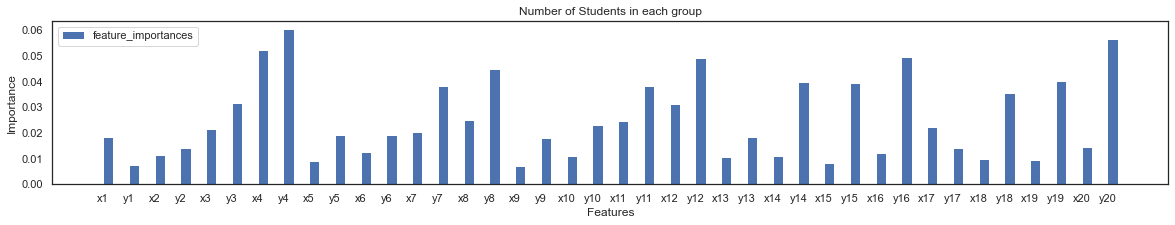

In [304]:
X_axis = np.arange(len(feature_names[:-1]))
plt.figure(figsize=(20, 3))  
plt.bar(X_axis + 0.2, feature_importances_list, 0.4, label = 'feature_importances')

plt.xticks(X_axis, feature_names[:-1])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

## 3.2. Correlation between features.

The features are continous, let's analyze the correlation between features and see if we can use the correlation method to perform a feature selection reducing the feature space and the size of the model to be used.

The criterion I have used to select which features to drop based on the correlations with other features is the following one:  

    1. Define a threshold or a threshold interval for the correlation to select an optimun value. 
    2. Calculate he pairs of features whose correlation is over the threshold. To compute this I use the absolut values of the correlation matrix and the threshold defined. Once I knkow which correlations above are over the threshold, I select the features to be deleted.
    3. There are features that are involved in more than one of the correlations that exceed the threshoold, I start selecting those. Then, with the correlations that I have left, I select of each correlation the pair that has a greater second maximun correlation. I do not know if more people do this but I just defined this criterion, it makes sense to me.

To study which is the best feature space based on the correlation method of selection I will compare a couple feature spaces using the original (40 features) as baseline. To carry on this comparison I will train a model and compare the accuracy scores that each feature combination obtains. I have chosen  Random Forest Classifier as the model.

There is a random factor, the split of the dataset. This variance, affects to the correlation values, and therefore affects the features that would be selected for a same threshold value. To get rid of this problem (On the feature selection phase), I calculate a mean correlation matrix.  
Alright, maybe the variance that the split produces is negligible. That will depend on the quality and size of the dataset, to cover my back I will take a conservative posture and minimize as much as possible the variance.

In [15]:
dataset_df = preprocessed_dataset_df.iloc[:,2:] # Delete the x0 and y0 features bc they are null, we used them as the origin point

In [16]:
# Mean Correlation Matrix Absolute corr values: The triangular (low) and the complete one (full)
def mean_corr_matrix_features(dataset_df, n_iter):
    
    X_df = dataset_df.iloc[:, :-1].copy() #Delete the label (It is categorical in this case, Pearson coeff should not be used)
    n_initial_features = len(X_df.columns)
    mean_corr_matrix = np.zeros((n_initial_features, n_initial_features)) #Initialize mean correlation matrix
    
    for iter in range(n_iter): #Do n_iter splits
        X_train_df, _ = train_test_split(X_df, test_size=0.2, shuffle=True, stratify = dataset_df['label'])
        corr_matrix = np.array(X_train_df.corr())
        mean_corr_matrix = mean_corr_matrix + corr_matrix
        
    mean_corr_matrix = mean_corr_matrix/n_iter
    corr_full = abs(np.array(X_train_df.corr())) #absolute corr values
    corr_tril = abs(np.tril(corr_full) - np.identity(corr_full.shape[0])) 
    
    return corr_tril, corr_full 

Here I obtain the  mean correlation matrix, using 50 iterations.

In [17]:
n_iter = 50
corr_tril, corr_full = mean_corr_matrix_features(dataset_df, n_iter)

Let's visualize the correlation matrix using seaborn and this function

In [18]:
#function to visualize the correlation, to plot the correlation matrix...
import seaborn as sns
import matplotlib.pyplot as plt

def corr_plot(corr_full): #Plots the corr matrix using the FULL corr matrix
    sns.set_theme(style="white")

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_full, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(dpi = 150)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_full, mask=mask, cmap=cmap,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

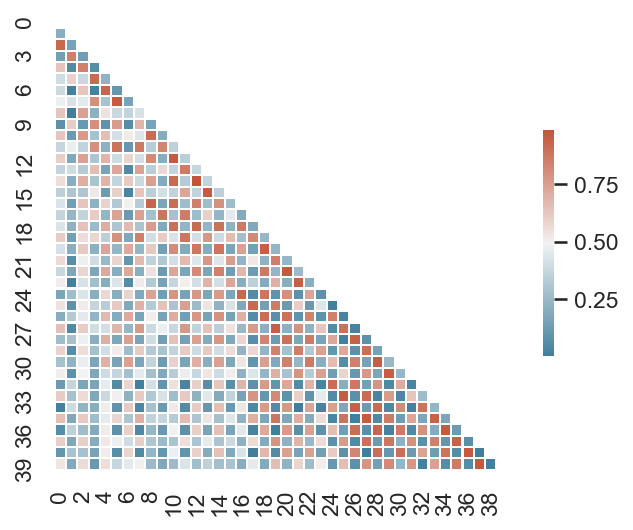

In [19]:
corr_plot(corr_full) # Plot of the (mean) correlation matrix of the features

To optimally select a value or values for the threshold, this is what I am going to do:  

    1. To analyze how a range of values affect to the dimensionality of the feature space: I will select a bunch of values for the threshold, to sweep through the most meaningful correlations. 
    2. I will select the threshold values that are the most interesting for me and then use the initial dimensionality as a baseline to compare the metrics (accuracy) by training a model (Random Forest).
 
 
 So let's visualize how the value of the threshold affects the number of 

In [20]:
def high_corr(threshold, corr_tril): # Returns a list of pairs of features which corr is above the threshold
    
    t = threshold
    corr = corr_tril.copy()
    highly_corr_feat = np.where(corr>t)
    
    high_corr_list = list(zip(highly_corr_feat[0], highly_corr_feat[1]))
        
    return high_corr_list


from collections import Counter


def high_corr_features(high_corr_list, corr_full): # Returns a list of the features that have to be deleted
    
    high_corr_list = [list(array) for array in high_corr_list]
    features_to_delete = []
    feature_presence = list(np.array(high_corr_list).reshape(-1))
    count = Counter(feature_presence)
    corr_full = corr_full.copy()

    for item in count.items():
        if item[1] > 1:
            features_to_delete.append(item[0])
    
    high_corr_list1 = high_corr_list.copy()
    
    for i in features_to_delete:
        for j in high_corr_list1:
            if i in j:
                if j in high_corr_list:
                    high_corr_list.remove(j)
    
    for i in high_corr_list:

        feat_a = i[0]
        feat_b = i[1]
        # Second max condition, so let's work with the rows of the complete corr matrix
        feat_a_row = list(corr_full[feat_a,:])
        feat_b_row = list(corr_full[feat_b,:])
        feat_a_row.remove(max(feat_a_row))
        max_2_a = max(feat_a_row)
        feat_b_row.remove(max(feat_b_row))
        max_2_b = max(feat_b_row)
        if max_2_a > max_2_b:
            features_to_delete.append(feat_a)
        else:
            features_to_delete.append(feat_b)      
    
            
    return features_to_delete


This next funcion is going to help me visualize how many features are above the different values of the threshold that I defined [0.6, 1]. That way I will get an idea of how many features I am dropping from the dataset for a given value.  
The sign of the correlation (Positive or Negative) is not important. The strength of the correlation is the insightful indicator, therefore I will work with absolute values of the threshold and correlations.
Later, I will be able to see which are the most correlated ones and how different feature combinations affect the performance of the model.

In [314]:
def threshold_values_list(threshold:tuple):

    if 0.0001<= threshold[2] < 0.001:
        const = 10000
    elif 0.001<= threshold[2] < 0.01:
        const = 1000
    elif 0.01<= threshold[2] < 0.1:
        const = 100
    elif 0.1 <= threshold[2]<=1:
        const = 10
    
    a = threshold[0]*const
    b = threshold[1]*const
    c = threshold[2]*const/10
    thresholds = np.arange(a, b, c)/const

    return thresholds

def apply_thresholds(threshold:tuple, corr_tril, corr_full):
    
    thresholds = threshold_values_list(threshold)
    
    feat_del_list = [] # List of Number of features droped from the Feature Space for the given values of the Threshold
    change_rate = [] # Change of the number of features from one threshold value to the next
    

    for i in range(len(thresholds)):        
        features_to_delete = corrs_over_the_threshold(thresholds[i], corr_tril, corr_full)
        feat_del = len(features_to_delete)
        feat_del_list.append(feat_del)
        if i==0:
            old= feat_del
        if i>0:
            new = feat_del
            if old != 0:
                change = 100*(old-new)/old
                change_rate.append(change)
                old = new
            if old == 0:
                change = 0
                change_rate.append(change)
                old = new
    return feat_del_list, change_rate, thresholds

def corr_threshold_plot (threshold:tuple, corr_tril, corr_full):
    
    feat_del_list, change_rate, thresholds = apply_thresholds(threshold, corr_tril, corr_full)

    plt.figure(dpi = 120)
    plt.plot(thresholds, feat_del_list, label = 'Num of features over threshold', linewidth = 0.7)
    plt.scatter(thresholds, feat_del_list, s = 0.05)
    plt.plot(thresholds, change_rate, label = 'Decrease Rate of that num %', linewidth = 0.7)
    plt.scatter(thresholds, change_rate, s =0.05)
    plt.ylabel('N Features>Threshold')
    plt.xlabel('ABS(Threshold)')
    plt.legend()
    plt.show()
    
def meaningful_t_values (threshold:tuple, corr_tril, corr_full):
    
    feat_del_list, change_rate, thresholds = apply_thresholds(threshold, corr_tril, corr_full)
    t_values = []
    thresholds = list(reversed(list(thresholds)))
    feat_del_list = list(reversed(list(feat_del_list)))

    old = -1
    for i in range(len(thresholds)):
        t = thresholds[i]
        new = feat_del_list[i]
        if new != old and new != corr_tril.shape[0]:
            t_values.append(round(t,5))
        else: pass
        old = new  
    return t_values # List of threshold values that where the number of features over the threshold changes
 
def corrs_over_the_threshold(threshold, corr_tril, corr_full): 
    feature_pairs_corrs_over_threshold = high_corr(threshold, corr_tril)
    features_to_delete = high_corr_features(feature_pairs_corrs_over_threshold, corr_full)

    return features_to_delete


[0.999, 0.986, 0.973, 0.971, 0.97, 0.967, 0.965, 0.96, 0.959, 0.956, 0.951, 0.95, 0.949, 0.939, 0.938, 0.925, 0.922, 0.919, 0.918, 0.915, 0.909, 0.902, 0.893, 0.884, 0.873, 0.862, 0.852, 0.837, 0.799, 0.757, 0.749, 0.748, 0.652] 33


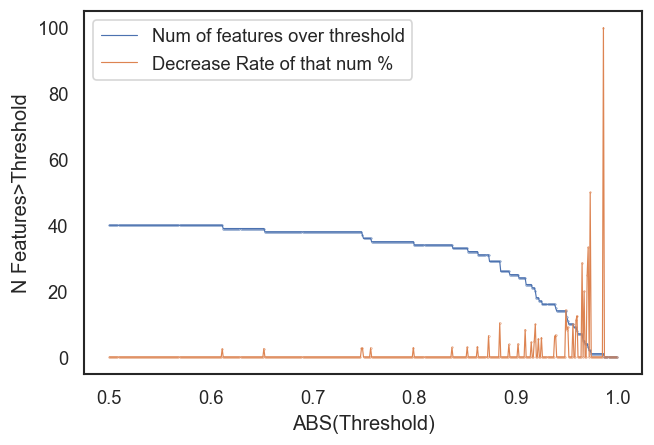

In [315]:
threshold = (0.5, 1, 0.01)
t_values = meaningful_t_values(threshold, corr_tril=corr_tril, corr_full=corr_full)
corr_threshold_plot(threshold, corr_tril=corr_tril, corr_full=corr_full)

From that plot we can extract the values of the threshold where the number of features over it decreases. I can reduce the number of threshold values to be included in the later analysis of performance saving computational resources and time. The function defined previously returns a list with those threshold values.

Curve of scores...

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score

def optimun_correlation_threshold(preprocessed_dataset_df, threshold:tuple, corr_tril, corr_full, n_iterations=10):
    
    X = preprocessed_dataset_df.iloc[:, 2:-1]
    y = preprocessed_dataset_df.iloc[:, -1]
    accuracy_history = []
    feature_names = X.columns
    thresholds = meaningful_t_values(threshold, corr_tril, corr_full)
    
    n_thresholds = len(thresholds)
    feat_list = []
    #to reduce the variance of the results we are going to repeat 15 times each iteration over the threshold values
    for i in range(n_iterations):
        
        i_time = time.time()        
        accuracy_iteration =[]
        n_features = len(corr_tril)
        #split into train and test => RANDOM 
        X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.2, shuffle=True, stratify = y.copy())
        j = 1
        #iterate over the threshold values:
        
        for t in thresholds:
            
            features_to_delete = corrs_over_the_threshold(t, corr_tril, corr_full)
                
            n_features_deleted = len(features_to_delete)
            
            X_train_t = X_train.copy()
            X_test_t = X_test.copy()

            t_time = time.time()

            #delete the features  whose correlation is over the treshold based on the criterion previously defined
            X_train_t.drop(X_train_t.columns[features_to_delete], axis = 1, inplace = True)
            X_test_t.drop(X_test_t.columns[features_to_delete], axis = 1, inplace = True)

            model = RFC() #create model
            
            model.fit(X_train_t, y_train) #train model
            
            y_pred = model.predict(X_test_t) #test model
            score = (accuracy_score(y_test, y_pred))*100 #Compute accuracy of the model trained with a reduced feature space
            accuracy_iteration.append(score) #save the score

            tit = round(time.time()-t_time,2)
            if i==0:
                feat_list.append(n_features-n_features_deleted)
            print(f'       -  Threshold {j}/{n_thresholds} / t = {t} / Feature Space n: {n_features-n_features_deleted} / Score: {round(score, 4)}% / time: {tit}  -         ')
            j +=1
            n_feat_del_old = n_features_deleted

        accuracy_history.append(accuracy_iteration)
        tit1 = round(time.time() -i_time,2)
        tit2 = f'{int((tit1-(tit1%60))/60)} min {round(tit1%60, 2)} s'
        print(f'\n***********[END OF Iter: {int(i)} // time: {tit2}]***********\n')
        
    
    accuracy = np.mean(np.array(accuracy_history), axis = 0)
    plt.plot(thresholds, accuracy, label = 'Score of the RFC model', linewidth = 0.5)
    plt.scatter(thresholds, accuracy, s = 2)
    plt.plot(thresholds, feat_list, label = 'N Features', linewidth = 0.5)
    plt.scatter(thresholds, feat_list, s = 2)
    plt.xlabel('Threshold Values')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()     

[0.9999, 0.9862, 0.9731, 0.9715, 0.9704, 0.9674, 0.9655, 0.9652, 0.9606, 0.959, 0.9565, 0.9519, 0.95, 0.9497, 0.9396, 0.9381, 0.9252, 0.9226, 0.9196, 0.918, 0.9158, 0.9095, 0.909, 0.9023, 0.8936, 0.8849, 0.8844, 0.8736, 0.8734, 0.8629, 0.8522, 0.8378, 0.7992, 0.7574, 0.7491, 0.7488, 0.6528] 37
       -  Threshold 1/37 / t = 0.9999 / Feature Space n: 40 / Score: 98.7847% / time: 12.72  -         
       -  Threshold 2/37 / t = 0.9862 / Feature Space n: 39 / Score: 98.7153% / time: 12.63  -         
       -  Threshold 3/37 / t = 0.9731 / Feature Space n: 38 / Score: 98.6111% / time: 12.66  -         
       -  Threshold 4/37 / t = 0.9715 / Feature Space n: 37 / Score: 98.6632% / time: 12.66  -         
       -  Threshold 5/37 / t = 0.9704 / Feature Space n: 36 / Score: 98.75% / time: 12.77  -         
       -  Threshold 6/37 / t = 0.9674 / Feature Space n: 35 / Score: 98.8542% / time: 11.62  -         
       -  Threshold 7/37 / t = 0.9655 / Feature Space n: 34 / Score: 98.8194% / tim

       -  Threshold 2/37 / t = 0.9862 / Feature Space n: 39 / Score: 98.9062% / time: 13.25  -         
       -  Threshold 3/37 / t = 0.9731 / Feature Space n: 38 / Score: 98.941% / time: 13.79  -         
       -  Threshold 4/37 / t = 0.9715 / Feature Space n: 37 / Score: 99.0451% / time: 13.53  -         
       -  Threshold 5/37 / t = 0.9704 / Feature Space n: 36 / Score: 98.941% / time: 13.09  -         
       -  Threshold 6/37 / t = 0.9674 / Feature Space n: 35 / Score: 98.9931% / time: 11.52  -         
       -  Threshold 7/37 / t = 0.9655 / Feature Space n: 34 / Score: 98.9236% / time: 11.56  -         
       -  Threshold 8/37 / t = 0.9652 / Feature Space n: 33 / Score: 98.9757% / time: 11.77  -         
       -  Threshold 9/37 / t = 0.9606 / Feature Space n: 32 / Score: 98.8194% / time: 11.23  -         
       -  Threshold 10/37 / t = 0.959 / Feature Space n: 31 / Score: 98.9062% / time: 11.42  -         
       -  Threshold 11/37 / t = 0.9565 / Feature Space n: 30 / Sco

       -  Threshold 6/37 / t = 0.9674 / Feature Space n: 35 / Score: 98.75% / time: 11.42  -         
       -  Threshold 7/37 / t = 0.9655 / Feature Space n: 34 / Score: 98.6806% / time: 11.26  -         
       -  Threshold 8/37 / t = 0.9652 / Feature Space n: 33 / Score: 98.8368% / time: 11.26  -         
       -  Threshold 9/37 / t = 0.9606 / Feature Space n: 32 / Score: 98.7847% / time: 11.2  -         
       -  Threshold 10/37 / t = 0.959 / Feature Space n: 31 / Score: 98.7847% / time: 11.66  -         
       -  Threshold 11/37 / t = 0.9565 / Feature Space n: 30 / Score: 98.8194% / time: 11.76  -         
       -  Threshold 12/37 / t = 0.9519 / Feature Space n: 29 / Score: 98.7847% / time: 11.23  -         
       -  Threshold 13/37 / t = 0.95 / Feature Space n: 28 / Score: 98.8021% / time: 11.4  -         
       -  Threshold 14/37 / t = 0.9497 / Feature Space n: 26 / Score: 98.7153% / time: 11.34  -         
       -  Threshold 15/37 / t = 0.9396 / Feature Space n: 25 / Sco

       -  Threshold 10/37 / t = 0.959 / Feature Space n: 31 / Score: 98.3507% / time: 11.08  -         
       -  Threshold 11/37 / t = 0.9565 / Feature Space n: 30 / Score: 98.3854% / time: 11.25  -         
       -  Threshold 12/37 / t = 0.9519 / Feature Space n: 29 / Score: 98.3333% / time: 11.3  -         
       -  Threshold 13/37 / t = 0.95 / Feature Space n: 28 / Score: 98.5243% / time: 11.21  -         
       -  Threshold 14/37 / t = 0.9497 / Feature Space n: 26 / Score: 98.4722% / time: 11.24  -         
       -  Threshold 15/37 / t = 0.9396 / Feature Space n: 25 / Score: 98.4896% / time: 11.38  -         
       -  Threshold 16/37 / t = 0.9381 / Feature Space n: 24 / Score: 98.4722% / time: 9.05  -         
       -  Threshold 17/37 / t = 0.9252 / Feature Space n: 23 / Score: 98.5243% / time: 9.03  -         
       -  Threshold 18/37 / t = 0.9226 / Feature Space n: 22 / Score: 98.5069% / time: 9.44  -         
       -  Threshold 19/37 / t = 0.9196 / Feature Space n: 20 /

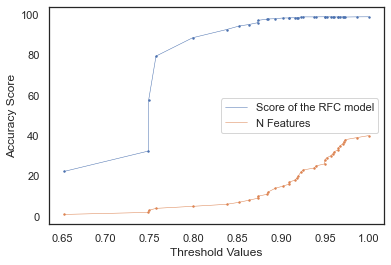

In [59]:
optimun_correlation_threshold(preprocessed_dataset_df,(0.5, 1, 0.001), corr_tril, corr_full, n_iterations=2)